In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing File

In [3]:
gender_df = pd.read_csv('dataset/gender_submission.csv')
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

In [4]:
gender_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### EDA

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


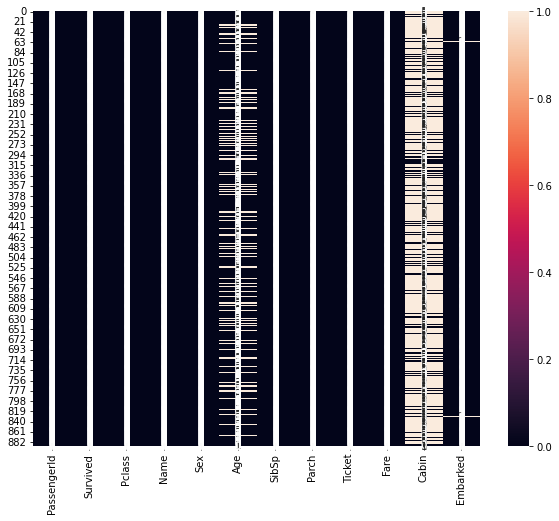

In [9]:
plt.figure(figsize=(10, 8))
train_null = train_df.isna()
sns.heatmap(train_null, annot=True)
plt.show()

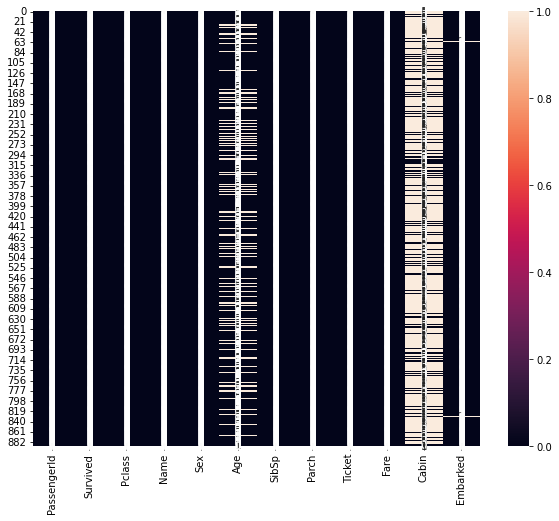

In [10]:
plt.figure(figsize=(10, 8))
test_null = test_df.isna()
sns.heatmap(train_null, annot=True)
plt.show()

#### Now we can say that Age and Cabin columns has a lot of missing values
#### Cabin columns sold be removed as it has almost null values

In [11]:
train_df.drop(columns='Cabin', inplace=True)
test_df.drop(columns='Cabin', inplace=True)

#### Imputing values in train dataset

In [12]:
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df['Age'] = mean_imp.fit_transform(train_df['Age'].values.reshape(-1,1))
train_df['Embarked'] = mode_imp.fit_transform(train_df['Embarked'].values.reshape(-1,1))

In [13]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Imputing values in test dataset

In [14]:
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

test_df['Age'] = mean_imp.fit_transform(test_df['Age'].values.reshape(-1,1))
test_df['Embarked'] = mode_imp.fit_transform(test_df['Embarked'].values.reshape(-1,1))

In [15]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### We have dealt with missing values now we can move to featured engineering

In [16]:
embarked = train_df['Embarked']
sex = train_df['Sex']
survived = train_df['Survived']
pclass = train_df['Pclass']
parch = train_df['Parch']
pd.crosstab([sex, embarked, pclass], [survived, parch])

Survived                  0                       1             
Parch                     0   1   2  3  4  5  6   0   1  2  3  5
Sex    Embarked Pclass                                          
female C        1         1   0   0  0  0  0  0  32   7  3  0  0
                2         0   0   0  0  0  0  0   5   0  2  0  0
                3         4   3   1  0  0  0  0   6   5  3  1  0
       Q        1         0   0   0  0  0  0  0   1   0  0  0  0
                2         0   0   0  0  0  0  0   2   0  0  0  0
                3         6   1   1  0  0  1  0  24   0  0  0  0
       S        1         0   0   2  0  0  0  0  30  10  8  0  0
                2         5   1   0  0  0  0  0  33  17  9  2  0
                3        25   9  15  1  2  2  1  20   7  5  0  1
male   C        1        18   5   2  0  0  0  0  13   3  1  0  0
                2         6   1   1  0  0  0  0   1   0  1  0  0
                3        31   2   0  0  0  0  0   6   4  0  0  0
       Q        1         1   0   0  0  0  0  0   0   0  0  0  0
                2         1   0   0  0  0  0  0   0   0  0  0  0
                3        31   5   0  0  0  0  0   3   0  0  0  0
       S        1        44   5   1  0  1  0  0  23   1  4  0  0
                2        74   6   2  0  0  0  0   7   7  1  0  0
                3       198  15  15  1  1  1  0  27   4  3  0  0

### Feature Engineering

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train_df.drop(columns=['Name', 'PassengerId', 'Ticket'], inplace=True)
test_df.drop(columns=['Name', 'PassengerId', 'Ticket'], inplace=True)

#### We have removed unnecessary columns, now Sex column must be converted using one_hot encoding technique to fed into model

In [19]:
train_df['Sex'] = LabelBinarizer().fit_transform(train_df['Sex'])

In [20]:
test_df['Sex'] = LabelBinarizer().fit_transform(test_df['Sex'])

In [21]:
train_df.Fare.quantile([.25, .5, .75]), train_df.Fare.median()

(0.25     7.9104
 0.50    14.4542
 0.75    31.0000
 Name: Fare, dtype: float64,
 14.4542)

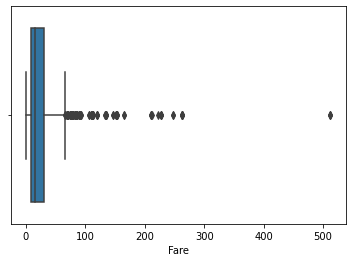

In [22]:
sns.boxplot(train_df.Fare)
plt.show()

#### Visualizing insights

In [23]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


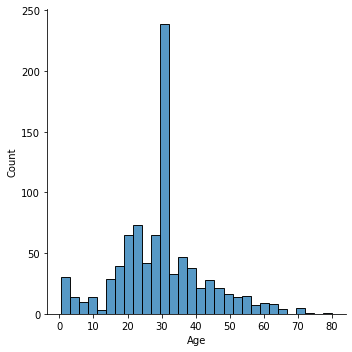

In [24]:
sns.displot(train_df['Age'])

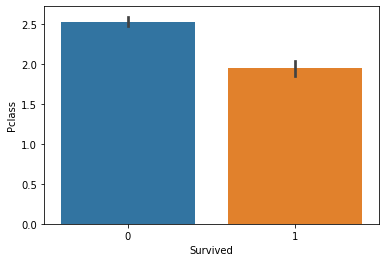

In [25]:
sns.barplot('Survived', 'Pclass', data=train_df)
plt.show()

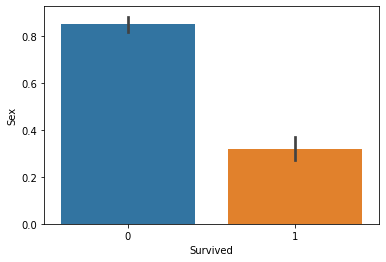

In [26]:
sns.barplot('Survived', 'Sex', data=train_df)
plt.show()

Text(0.5, 1.0, 'Survival probability by sex and passenger class')

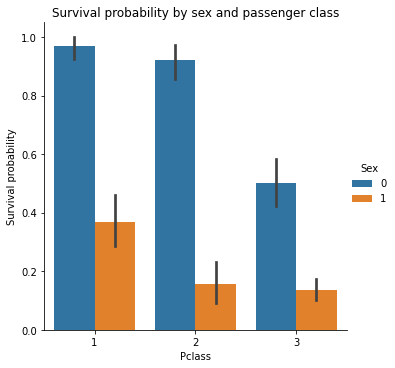

In [27]:
t=sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train_df, kind='bar')
plt.ylabel("Survival probability")
plt.title("Survival probability by sex and passenger class")

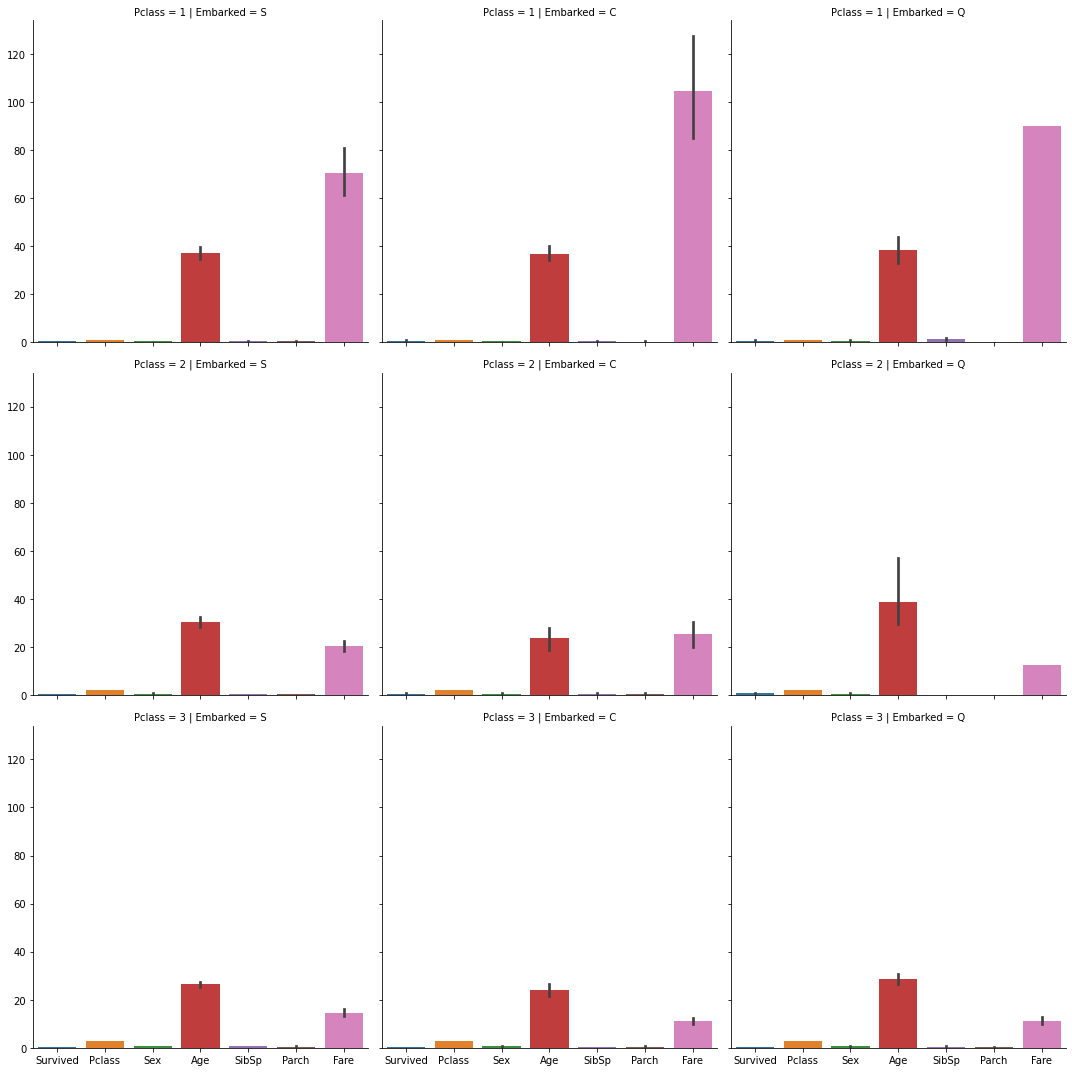

In [28]:
sns.factorplot(row='Pclass', col='Embarked', data=train_df, kind='bar')
plt.show()

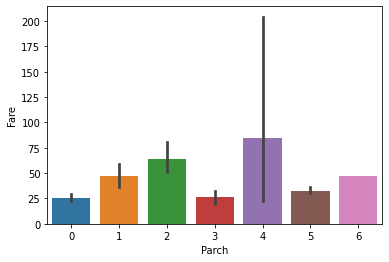

In [29]:
sns.barplot(x='Parch', y='Fare', data=train_df)
plt.show()

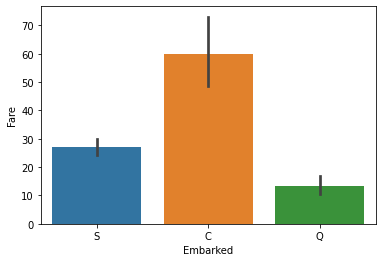

In [30]:
sns.barplot(x='Embarked', y='Fare', data=train_df)
plt.show()

In [31]:
pclass_ = train_df.groupby('Pclass')['Survived'].value_counts().unstack()

In [32]:
pclass_

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


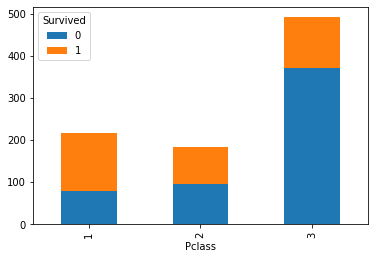

In [33]:
pclass_.plot(kind='bar', stacked=True)
plt.show()

In [34]:
Sex = train_df.groupby('Sex')['Survived'].value_counts().unstack()

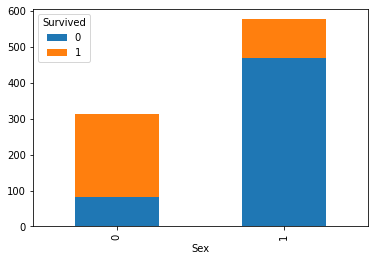

In [35]:
Sex.plot(kind='bar', stacked=True)
plt.show()

In [36]:
Embark = train_df.groupby('Embarked')['Survived'].value_counts().unstack()

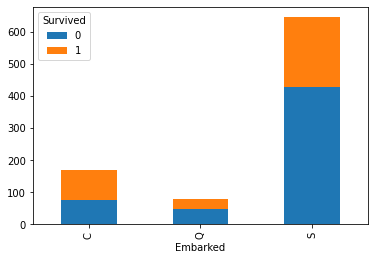

In [37]:
Embark.plot(kind='bar', stacked=True)
plt.show()

In [38]:
label = LabelEncoder()
train_df.Embarked = label.fit_transform(train_df.Embarked)
test_df.Embarked = label.fit_transform(test_df.Embarked)

### KNN Classification Model Setup 

In [39]:
train_df.shape, test_df.shape

((891, 8), (418, 7))

In [40]:
# Defining variables

# Train data
X = train_df.iloc[:, 1:]    #-- Excluding "Survived" column
y = train_df.iloc[:, 0]     #-- Storing "Survived" column as target

# Test data
X_ = test_df.iloc[:, 1:]    #-- Excluding "Survived" column
y_ = test_df.iloc[:, 0]     #-- Storing "Survived" column as target

In [41]:
X.shape, y.shape

((891, 7), (891,))

In [42]:
LR = LogisticRegression()    

In [43]:
LR.fit(X, y)

LogisticRegression()

In [44]:
test_df.Fare.fillna(test_df.Fare.mean(), inplace=True)

In [45]:
# X.columns, test_df.columns

In [46]:
pred = LR.predict(test_df)

In [47]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Model Scores

In [48]:
LR.score(X, y)

0.8002244668911336

In [49]:
r2_score(gender_df.iloc[:, 1], pred)

0.7415413533834587

### Appending predicted values to test dataset

In [50]:
test_df['Survived'] = pred

In [51]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1


In [52]:
gender_df['Predicted values'] = pred

In [56]:
gender_df

,PassengerId,Survived,Predicted values
0,892,0,0
1,893,1,0
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [57]:
gender_df.drop(columns='PassengerId', inplace=True)

### Exporting data into csv

In [58]:
gender_df.to_csv('Submission.csv', index=False)